## Data Visualization I
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information
about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to
see if we can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram

In [4]:
import pandas as pd
import seaborn as sns

In [14]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)

In [17]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [18]:
# label-encoding:

df['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

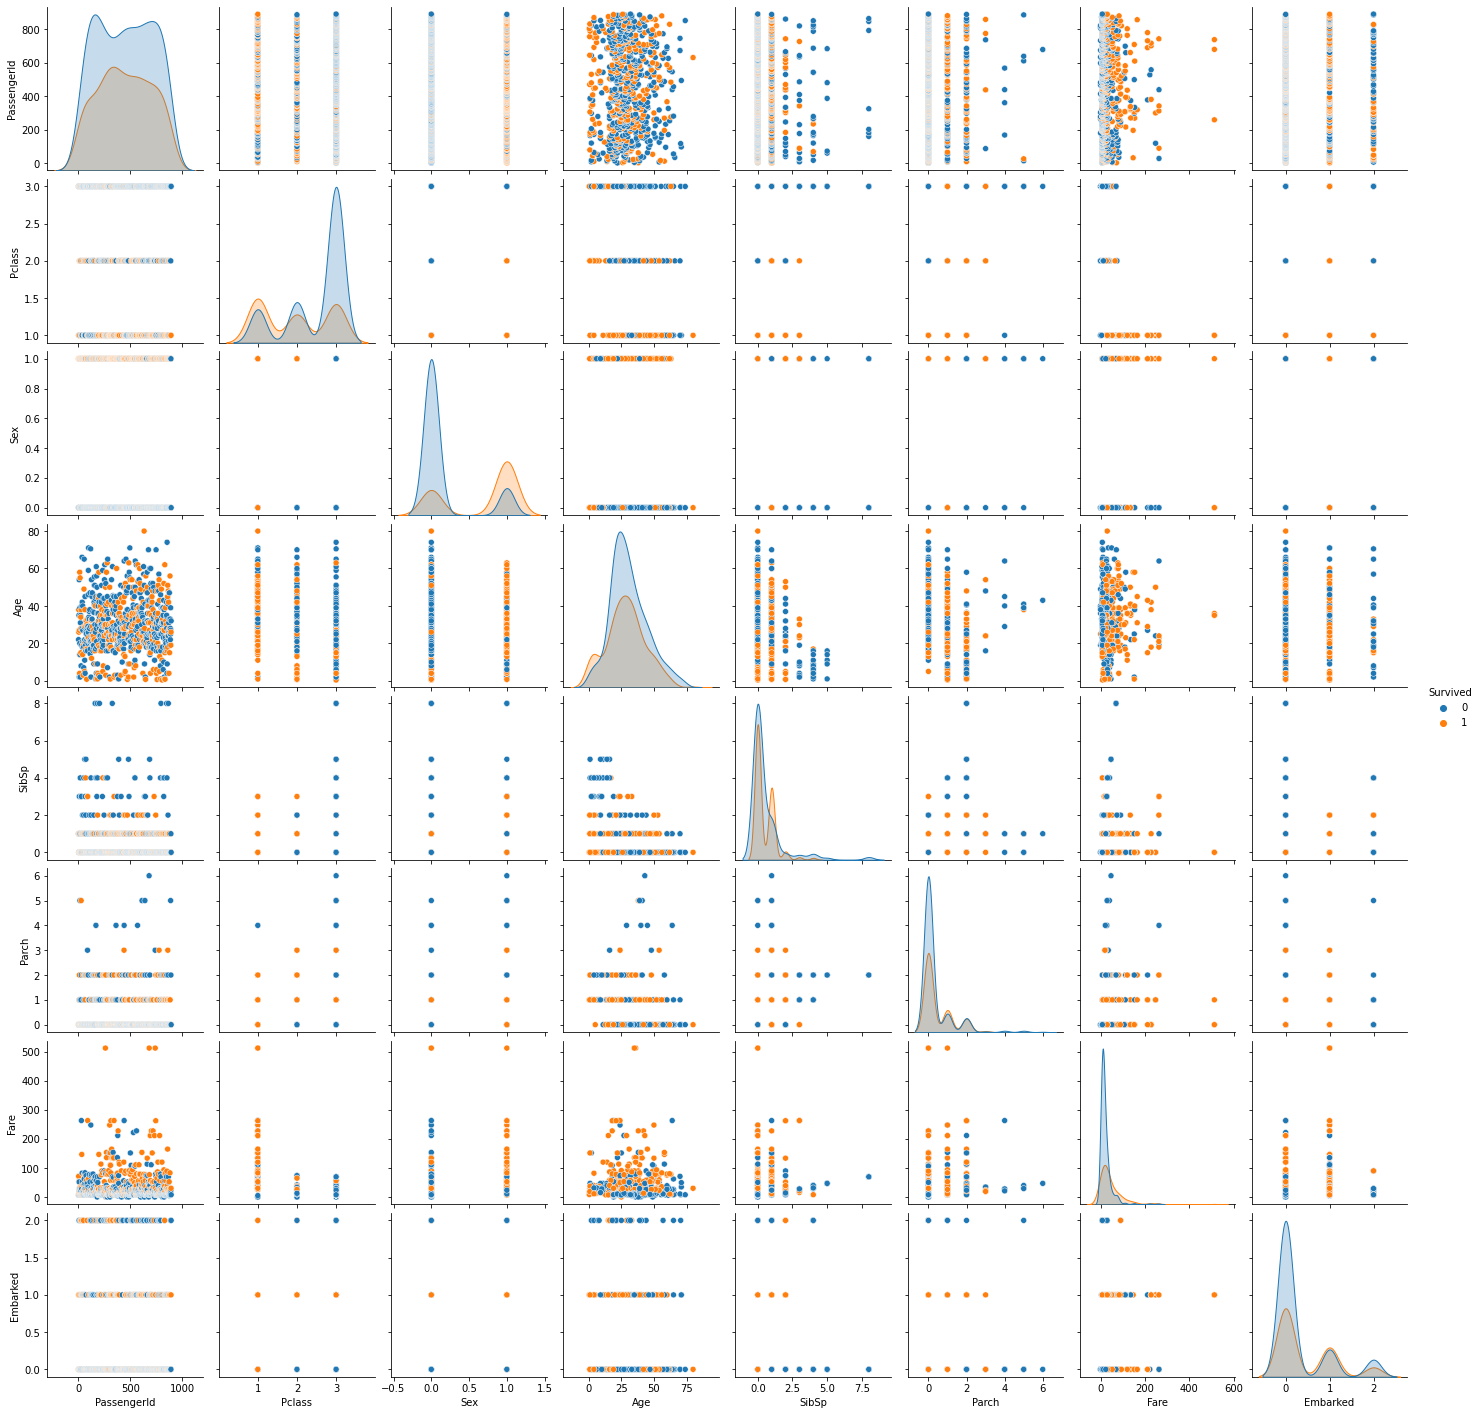

In [21]:
sns.pairplot(df,hue="Survived")

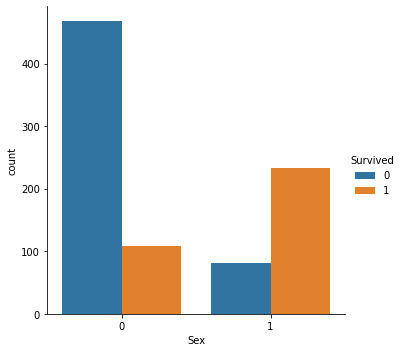

In [22]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

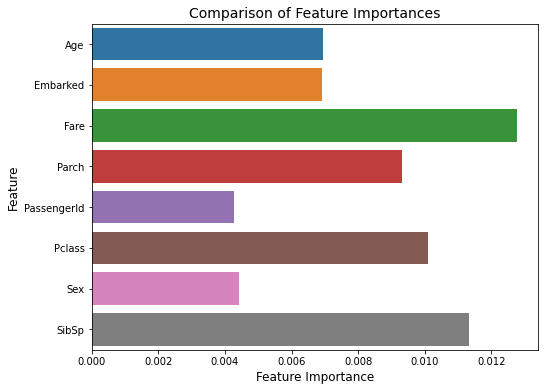

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

df.dropna(inplace=True)
y = df['Survived']
#  sort by column names
X = df.drop(['Survived'], axis=1).sort_index(axis=1)

# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 5) 
# Training the model 
extra_tree_forest.fit(X, y) 
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0) 

# Plot - compare feature importance
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance_normalized,y=X.columns)
plt.xlabel('Feature Importance',fontsize=12)
plt.ylabel('Feature',fontsize=12)
plt.title('Comparison of Feature Importances', fontsize=14)
plt.show()

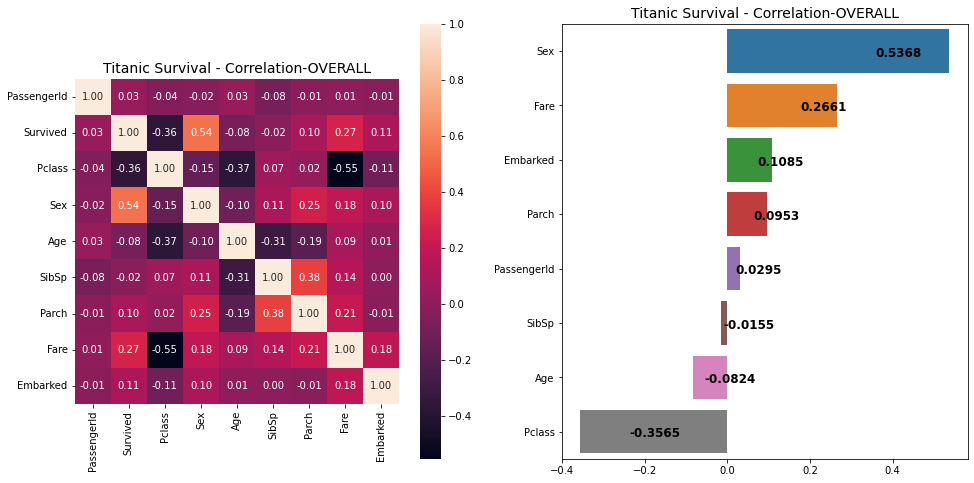

In [30]:
corrALL = df.corr()['Survived'].sort_values(ascending=False)
corrALL = corrALL.drop(['Survived'])

#  heatmap and barplot
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.title('Titanic Survival - Correlation-OVERALL', fontsize=14)
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)
fig.add_subplot(122)
plt.title('Titanic Survival - Correlation-OVERALL', fontsize=14)
ax = sns.barplot(y=corrALL.index,x=corrALL.values)
for i in ax.patches: 
    plt.text(i.get_width()/1.5, i.get_y()+.5,  
             str(round((i.get_width()), 4)), 
             fontsize = 12, fontweight ='bold', 
             color ='black')
plt.show()

AttributeError: 'Rectangle' object has no property 'hist'

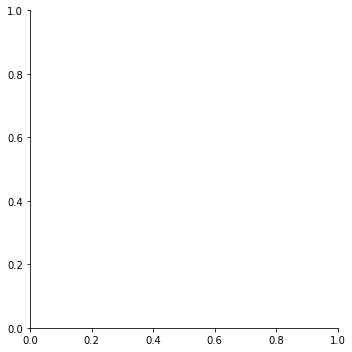

In [41]:
#part 2:

sns.displot(df['Fare'], hist = False, kde = True, 
                  label = df['Pclass'].unique)

In [51]:
temp=pd.read_csv('titanic.csv')
temp['Pclass']=temp['Pclass'].astype('category')

/home/pict/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

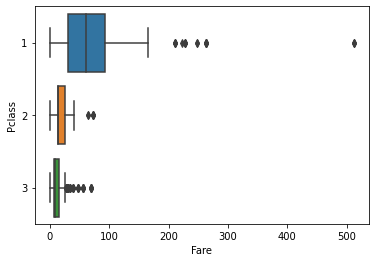

In [52]:
sns.boxplot('Fare', 'Pclass', data = temp)